## Cross Validation Schemes

In this notebook we'll try out cross validation schemes on the boston housing dataset.

Boston housing is an ideal dataset because it's so small and unstable in nature, in fact we already saw this earlier.


In [1]:
import numpy as np
from keras.datasets import boston_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
from sklearn.preprocessing import StandardScaler

# Using Pipelines

Now because we want to use a cross validation scheme we need to be very careful with the scaled statistics.
We cannot compute the statistics on the entire training data, because that would also include the test data (that will be split out during the validation process).

So, this means we need to compute the scaling statistics on each training fold of the cross validation and then apply it to the testing fold.

Sounds complicated right? Well it's a headache which is why scikit learn handles so much of it for us.

In order to get keras and scikit learn to play nice, we'll have to use a wrapper function from keras.

In [4]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras import models
from keras import layers

from sklearn.model_selection import cross_val_score, ShuffleSplit, KFold
from sklearn.pipeline import make_pipeline


## write a method for the keras wrapper

In [5]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # 1 output for regression, also no activation function!

    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics =['mse'])
    return model

##  Use the keras wrapper with the method we wrote

In [6]:
model = KerasRegressor(build_fn=build_model, epochs=100, batch_size=16, verbose=0)

##  Pipelines + Cross Validation

We need to create two objects now

(1) A Crossvalidation object (CV), I'm choosing shuffle split below
(2) A pipeline

the CV object is pretty straightforward so I won't explain it.

The pipeline is a bit more confusing.  Basically you give it a set of steps to do, you can list a bunch of objects, but the rule is that every object **must** have a `.transform` method, except for the final step.

In [7]:
pipe = make_pipeline(StandardScaler(), model)

Here we see the pipeline has two objects.  You can read a pipeline as a series of steps

In [8]:
pipe.steps

[('standardscaler', StandardScaler()),
 ('kerasregressor',
  <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor at 0x22a0b359460>)]

We see that the first step is the standard scaler, followed by our keras object.  Now we have our pipeline.  We can pass the pipeline anywhere we would normally pass a scikit-learn model.  Scikit learn will always interpret the pipeline as:

  * do step one -- always a transformation of the data
  * do step two -- either another transformation or in our case -- fit the model
  
The `cross_val_score` method will automatically handle the cross validation splitting (using the cv object we chose) and implement all the steps in the pipeline at the correct time.

Complicated! But pretty easy to use once you are used to it.

In [9]:
ss = ShuffleSplit(n_splits=100, test_size=0.1) 
results = cross_val_score(pipe, train_data , train_labels, cv=ss, scoring='neg_mean_squared_error')

We can print the mean of our results.

In [10]:
results.mean()

-9.699899387946315

In [11]:
len(results)

100

## Plot a distribution of the results

Since the results are just a long list of scores (from all the folds), we can actually plot the distribution as well.  It's quite informative, as it tells us what kind of variance and patterns our model has in the answers it creates.

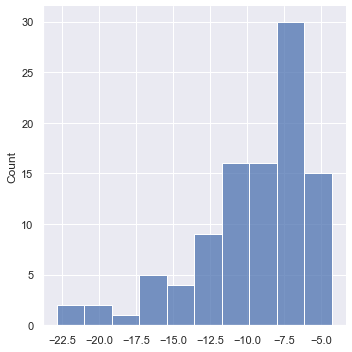

In [13]:
sns.displot(results, kde = False)

## This model seems like it has a lot of variation!

We already ran it 100 times, so more runs will probably fall into the same pattern.
What can we do to stabilize it's scores?  



your answer here:

basic regularization techniques, reducting complexity.  reduce dimensions.

## Can you lower the mean squared error? or raise the neg mean squared error?

your answer here : (how did you do it?)